In [1]:
# 3-1-3

In [2]:
%matplotlib inline
import iris
import iris.quickplot as qplt
import iris.plot as iplt
import iris.coord_categorisation
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import numpy as np
import numpy.ma as ma
import time
import statsmodels.api as sm

from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker

### This module is needed while plotting with time axis
import nc_time_axis

indir= './Data/'

In [3]:
# 3-1-4

In [9]:
cubes = iris.load(indir+'tas_Amon_KACE-1-0-G_historical_r1i1p1f1_gr_190001-201412.nc')
print(cubes)          # 큐브에 저장된 자료의 정보 출력


0: air_temperature / (K)               (time: 1380; latitude: 144; longitude: 192)


/Users/djin1/opt/miniconda3/lib/python3.8/site-packages/iris/fileformats/cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(
HDF5-DIAG: Error detected in HDF5 (1.12.2) thread 1:
  #000: H5A.c line 528 in H5Aopen_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #001: H5VLcallback.c line 1091 in H5VL_attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #002: H5VLcallback.c line 1058 in H5VL__attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #003: H5VLnative_attr.c line 130 in H5VL__native_attr_open(): can't open attribute
    major: Attribute
    minor: Can't open object
  #004: H5Aint.c line 545 in H5A__open_by_name(): unable to load attribute info from object header
    major: Attribute
    minor: Unable to initialize object
  #005: H5Oattribute.c line 476 in H5O__attr_open_by_name(): can

In [10]:
cube = cubes[0]        # 0번째 큐브 리스트를 cube 변수에 저장
print(cube)


air_temperature / (K)               (time: 1380; latitude: 144; longitude: 192)
    Dimension coordinates:
        time                             x               -               -
        latitude                         -               x               -
        longitude                        -               -               x
    Scalar coordinates:
        height                      2.0 m
    Cell methods:
        mean                        area (1 month), time (1 month)
    Attributes:
        Conventions                 'CF-1.7 CMIP-6.2'
        NCO                         'netCDF Operators version 4.7.5 (Homepage = http://nco.sf.net, Code = h ...'
        activity_id                 'CMIP'
        branch_method               'standard'
        branch_time_in_child        0.0
        branch_time_in_parent       109500.0
        cmor_version                '3.4.0'
        comment                     'near-surface (usually, 2 meter) air temperature'
        contact              

In [11]:
print(cube.shape)                    # 큐브의 배열 모양
print(cube.ndim)                      # 큐브의 배열 개수
print(cube.long_name)            # 큐브의 변수 이름
print(cube.units)                      # 큐브의 자료 단위
print(cube.summary(True))     # 큐브의 배열 정보 출력


(1380, 144, 192)
3
Near-Surface Air Temperature
K
air_temperature / (K)               (time: 1380; latitude: 144; longitude: 192)


In [12]:
print(cube[0,:,:].coord('time'))          # cube의 첫번째 시간에 대한 ‘time’ 격자 정보 확인

DimCoord :  time / (days since 1850-01-01, 360_day calendar)
    points: [1900-01-16 00:00:00]
    bounds: [[1900-01-01 00:00:00, 1900-02-01 00:00:00]]
    shape: (1,)  bounds(1, 2)
    dtype: float64
    standard_name: 'time'
    long_name: 'time'
    var_name: 'time'


In [13]:
print(cube[-1,:,:].coord('time'))          # cube의 마지막 시간에 대한 ‘time’ 격자 정보 확인

DimCoord :  time / (days since 1850-01-01, 360_day calendar)
    points: [2014-12-16 00:00:00]
    bounds: [[2014-12-01 00:00:00, 2015-01-01 00:00:00]]
    shape: (1,)  bounds(1, 2)
    dtype: float64
    standard_name: 'time'
    long_name: 'time'
    var_name: 'time'


In [14]:
print(cube[0,:,:].data)                        # cube의 첫번째 시간에 저장된 자료 값을 확인

HDF5-DIAG: Error detected in HDF5 (1.12.2) thread 1:
  #000: H5A.c line 528 in H5Aopen_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #001: H5VLcallback.c line 1091 in H5VL_attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #002: H5VLcallback.c line 1058 in H5VL__attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #003: H5VLnative_attr.c line 130 in H5VL__native_attr_open(): can't open attribute
    major: Attribute
    minor: Can't open object
  #004: H5Aint.c line 545 in H5A__open_by_name(): unable to load attribute info from object header
    major: Attribute
    minor: Unable to initialize object
  #005: H5Oattribute.c line 476 in H5O__attr_open_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #006: H5Adense.c line 394 in H5A__dense_open(): can't locate attribute in name index
    major: Attribute
    minor: Object not 

[[250.46875 250.4751  250.47876 ... 250.46313 250.4563  250.47217]
 [251.67358 251.60645 251.55933 ... 251.844   251.79346 251.72046]
 [252.5542  252.47607 252.39526 ... 252.93042 252.8086  252.68237]
 ...
 [235.21118 235.3877  235.6106  ... 234.51831 234.7561  234.96875]
 [234.74634 234.83691 234.9143  ... 234.53564 234.67578 234.71729]
 [234.698   234.7439  234.76636 ... 234.65479 234.69165 234.68481]]


In [15]:
# 3-1-5

HDF5-DIAG: Error detected in HDF5 (1.12.2) thread 1:
  #000: H5A.c line 528 in H5Aopen_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #001: H5VLcallback.c line 1091 in H5VL_attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #002: H5VLcallback.c line 1058 in H5VL__attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #003: H5VLnative_attr.c line 130 in H5VL__native_attr_open(): can't open attribute
    major: Attribute
    minor: Can't open object
  #004: H5Aint.c line 545 in H5A__open_by_name(): unable to load attribute info from object header
    major: Attribute
    minor: Unable to initialize object
  #005: H5Oattribute.c line 476 in H5O__attr_open_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #006: H5Adense.c line 394 in H5A__dense_open(): can't locate attribute in name index
    major: Attribute
    minor: Object not 

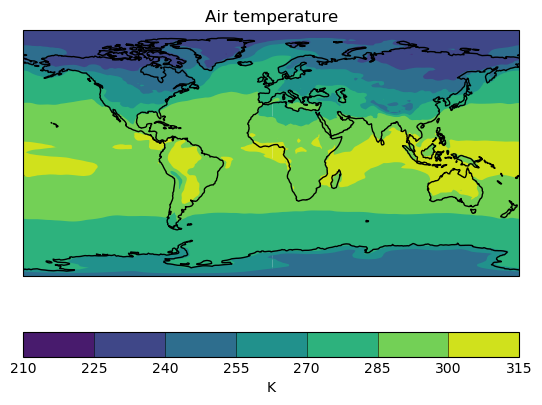

In [16]:
qplt.contourf(cube[0,:,:])           # contour plot 그리기
plt.gca().coastlines();               # 해안선 표시
plt.show();


HDF5-DIAG: Error detected in HDF5 (1.12.2) thread 1:
  #000: H5A.c line 528 in H5Aopen_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #001: H5VLcallback.c line 1091 in H5VL_attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #002: H5VLcallback.c line 1058 in H5VL__attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #003: H5VLnative_attr.c line 130 in H5VL__native_attr_open(): can't open attribute
    major: Attribute
    minor: Can't open object
  #004: H5Aint.c line 545 in H5A__open_by_name(): unable to load attribute info from object header
    major: Attribute
    minor: Unable to initialize object
  #005: H5Oattribute.c line 476 in H5O__attr_open_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #006: H5Adense.c line 394 in H5A__dense_open(): can't locate attribute in name index
    major: Attribute
    minor: Object not 

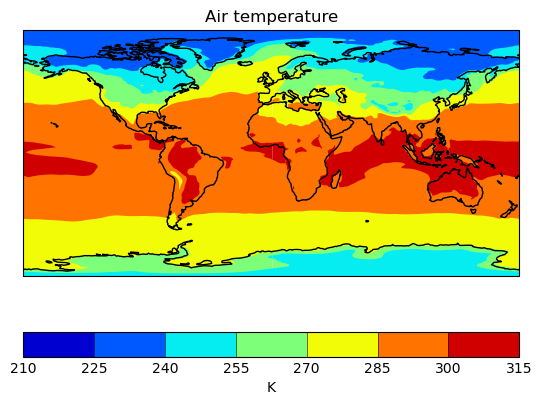

In [17]:
plt.set_cmap('jet')                     # 색지도(colormap) 변경
qplt.contourf(cube[0,:,:])           # contour plot 그리기
plt.gca().coastlines()                 # 해안선 표시
plt.show();


HDF5-DIAG: Error detected in HDF5 (1.12.2) thread 2:
  #000: H5A.c line 528 in H5Aopen_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #001: H5VLcallback.c line 1091 in H5VL_attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #002: H5VLcallback.c line 1058 in H5VL__attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #003: H5VLnative_attr.c line 130 in H5VL__native_attr_open(): can't open attribute
    major: Attribute
    minor: Can't open object
  #004: H5Aint.c line 545 in H5A__open_by_name(): unable to load attribute info from object header
    major: Attribute
    minor: Unable to initialize object
  #005: H5Oattribute.c line 476 in H5O__attr_open_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #006: H5Adense.c line 394 in H5A__dense_open(): can't locate attribute in name index
    major: Attribute
    minor: Object not 

HDF5-DIAG: Error detected in HDF5 (1.12.2) thread 1:
  #000: H5A.c line 528 in H5Aopen_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #001: H5VLcallback.c line 1091 in H5VL_attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #002: H5VLcallback.c line 1058 in H5VL__attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #003: H5VLnative_attr.c line 130 in H5VL__native_attr_open(): can't open attribute
    major: Attribute
    minor: Can't open object
  #004: H5Aint.c line 545 in H5A__open_by_name(): unable to load attribute info from object header
    major: Attribute
    minor: Unable to initialize object
  #005: H5Oattribute.c line 476 in H5O__attr_open_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #006: H5Adense.c line 394 in H5A__dense_open(): can't locate attribute in name index
    major: Attribute
    minor: Object not 

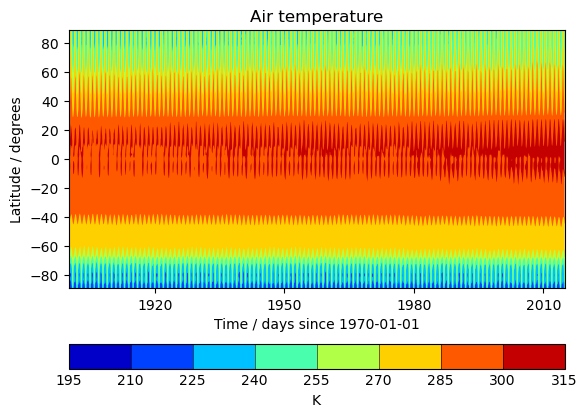

In [18]:
zonal_mean = cube.collapsed('longitude', iris.analysis.MEAN)      # 경도에 대한 평균
qplt.contourf(zonal_mean)
plt.show();


HDF5-DIAG: Error detected in HDF5 (1.12.2) thread 2:
  #000: H5A.c line 528 in H5Aopen_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #001: H5VLcallback.c line 1091 in H5VL_attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #002: H5VLcallback.c line 1058 in H5VL__attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #003: H5VLnative_attr.c line 130 in H5VL__native_attr_open(): can't open attribute
    major: Attribute
    minor: Can't open object
  #004: H5Aint.c line 545 in H5A__open_by_name(): unable to load attribute info from object header
    major: Attribute
    minor: Unable to initialize object
  #005: H5Oattribute.c line 476 in H5O__attr_open_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #006: H5Adense.c line 394 in H5A__dense_open(): can't locate attribute in name index
    major: Attribute
    minor: Object not 

HDF5-DIAG: Error detected in HDF5 (1.12.2) thread 1:
  #000: H5A.c line 528 in H5Aopen_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #001: H5VLcallback.c line 1091 in H5VL_attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #002: H5VLcallback.c line 1058 in H5VL__attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #003: H5VLnative_attr.c line 130 in H5VL__native_attr_open(): can't open attribute
    major: Attribute
    minor: Can't open object
  #004: H5Aint.c line 545 in H5A__open_by_name(): unable to load attribute info from object header
    major: Attribute
    minor: Unable to initialize object
  #005: H5Oattribute.c line 476 in H5O__attr_open_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #006: H5Adense.c line 394 in H5A__dense_open(): can't locate attribute in name index
    major: Attribute
    minor: Object not 

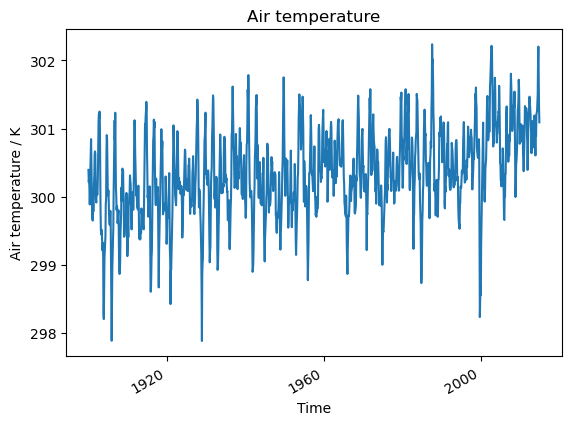

In [19]:
fig = plt.figure()
qplt.plot(cube[:,75,100])         # 특정 위경도에 대한 시간 변화를 그림으로 표출
fig.autofmt_xdate()                 # 그림의 x축 tick 라벨이 겹치지 않도록 자동으로 회전
plt.show();


HDF5-DIAG: Error detected in HDF5 (1.12.2) thread 2:
  #000: H5A.c line 528 in H5Aopen_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #001: H5VLcallback.c line 1091 in H5VL_attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #002: H5VLcallback.c line 1058 in H5VL__attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #003: H5VLnative_attr.c line 130 in H5VL__native_attr_open(): can't open attribute
    major: Attribute
    minor: Can't open object
  #004: H5Aint.c line 545 in H5A__open_by_name(): unable to load attribute info from object header
    major: Attribute
    minor: Unable to initialize object
  #005: H5Oattribute.c line 476 in H5O__attr_open_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #006: H5Adense.c line 394 in H5A__dense_open(): can't locate attribute in name index
    major: Attribute
    minor: Object not 

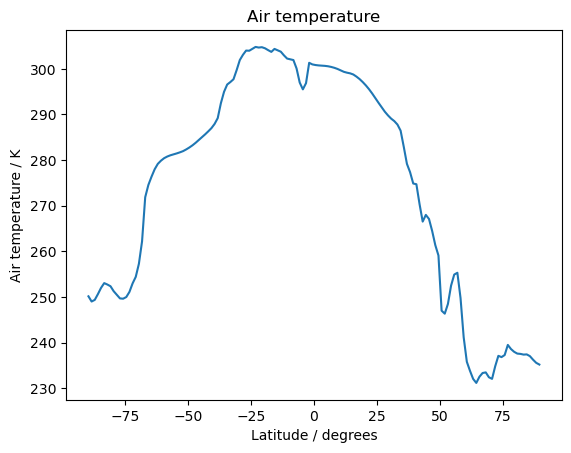

In [20]:
qplt.plot(cube[0,:,75])            # 첫번째 시간, 75번째 경도에서의 위도별 온도 분포  표출
plt.show();


In [21]:
# 3-1-6

HDF5-DIAG: Error detected in HDF5 (1.12.2) thread 1:
  #000: H5A.c line 528 in H5Aopen_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #001: H5VLcallback.c line 1091 in H5VL_attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #002: H5VLcallback.c line 1058 in H5VL__attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #003: H5VLnative_attr.c line 130 in H5VL__native_attr_open(): can't open attribute
    major: Attribute
    minor: Can't open object
  #004: H5Aint.c line 545 in H5A__open_by_name(): unable to load attribute info from object header
    major: Attribute
    minor: Unable to initialize object
  #005: H5Oattribute.c line 476 in H5O__attr_open_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #006: H5Adense.c line 394 in H5A__dense_open(): can't locate attribute in name index
    major: Attribute
    minor: Object not 

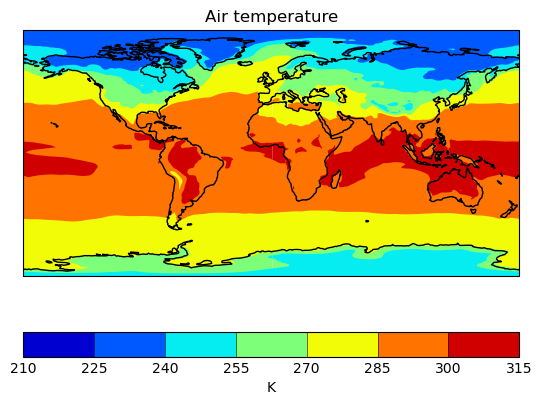

In [22]:
ax = plt.axes(projection=ccrs.PlateCarree())         # PlateCarree map projection 
qplt.contourf(cube[0,:,:]) # 0 시간에서의 위경도 값 표출 
plt.gca().coastlines()
plt.show();


HDF5-DIAG: Error detected in HDF5 (1.12.2) thread 2:
  #000: H5A.c line 528 in H5Aopen_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #001: H5VLcallback.c line 1091 in H5VL_attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #002: H5VLcallback.c line 1058 in H5VL__attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #003: H5VLnative_attr.c line 130 in H5VL__native_attr_open(): can't open attribute
    major: Attribute
    minor: Can't open object
  #004: H5Aint.c line 545 in H5A__open_by_name(): unable to load attribute info from object header
    major: Attribute
    minor: Unable to initialize object
  #005: H5Oattribute.c line 476 in H5O__attr_open_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #006: H5Adense.c line 394 in H5A__dense_open(): can't locate attribute in name index
    major: Attribute
    minor: Object not 

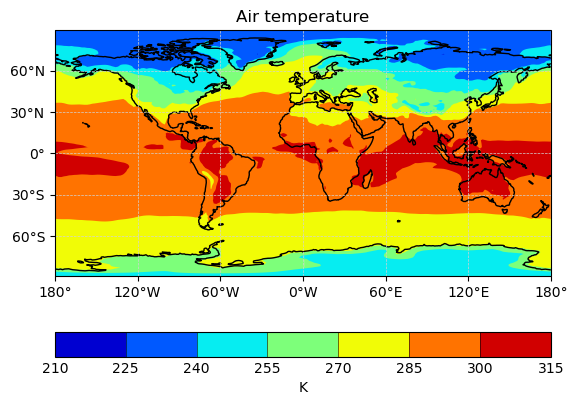

In [23]:
ax = plt.axes(projection=ccrs.PlateCarree())            # PlateCarree map projection
# x, y lon, lat ticks 라벨을 위한 설정
ax.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree()) 
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
# lon, lat 라벨 형식을 결정
lon_formatter = LongitudeFormatter(zero_direction_label=True) 
lat_formatter = LatitudeFormatter() 
ax.xaxis.set_major_formatter(lon_formatter) 
ax.yaxis.set_major_formatter(lat_formatter)
# gridline 설정
ax.gridlines(color='lightgray',linestyle='--',linewidth=0.5)     # 라인색, 스타일, 굵기
qplt.contourf(cube[0,:,:])
plt.gca().coastlines()              # 해안선 표시
plt.show();


HDF5-DIAG: Error detected in HDF5 (1.12.2) thread 1:
  #000: H5A.c line 528 in H5Aopen_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #001: H5VLcallback.c line 1091 in H5VL_attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #002: H5VLcallback.c line 1058 in H5VL__attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #003: H5VLnative_attr.c line 130 in H5VL__native_attr_open(): can't open attribute
    major: Attribute
    minor: Can't open object
  #004: H5Aint.c line 545 in H5A__open_by_name(): unable to load attribute info from object header
    major: Attribute
    minor: Unable to initialize object
  #005: H5Oattribute.c line 476 in H5O__attr_open_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #006: H5Adense.c line 394 in H5A__dense_open(): can't locate attribute in name index
    major: Attribute
    minor: Object not 

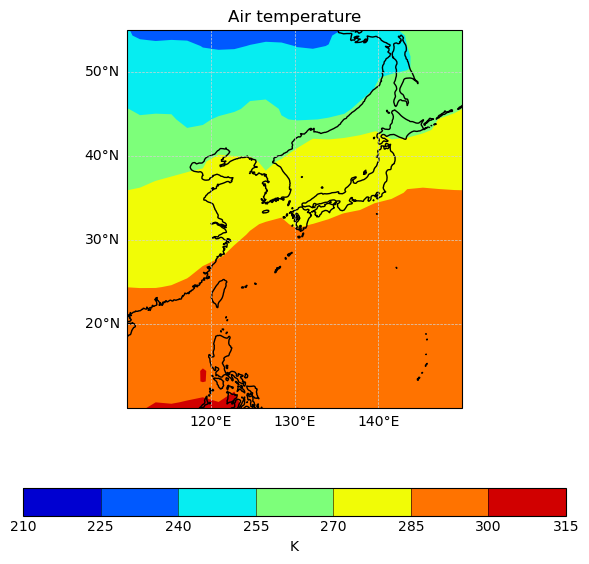

In [24]:
fig = plt.figure(figsize=(7,7))                  # 그림 크기 설정
ax = plt.axes(projection=ccrs.PlateCarree()) 
ax.set_extent([110, 150, 10, 55], crs=ccrs.PlateCarree())     # 표출하고자 하는 위경도 설정
qplt.contourf(cube[0,:,:]) 
plt.gca().coastlines()
xticks = [100,110,120,130,140,150,160]# x축 경도 tick 라벨 설정
yticks = [10,20,30,40,50,60,70] # y축 위도 tick 라벨 설정
g1 = plt.gca().gridlines(color='lightgray',linestyle='--',linewidth=0.5)     # gridline 설정
##g1.xlabels_bottom = True                 # x축 라벨은 아래쪽만 표시
g1.bottom_labels = True                 # x축 라벨은 아래쪽만 표시
##g1.ylabels_left = True                    # y축 라벨은 왼쪽만 표시
g1.left_labels = True                    # y축 라벨은 왼쪽만 표시
g1.xformatter = LONGITUDE_FORMATTER
g1.yformatter = LATITUDE_FORMATTER
g1.xlocator = mticker.FixedLocator([100,110,120,130,140,150,160,170])
g1.ylocator = mticker.FixedLocator([10,20,30,40,50,60,70])
plt.show();


HDF5-DIAG: Error detected in HDF5 (1.12.2) thread 2:
  #000: H5A.c line 528 in H5Aopen_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #001: H5VLcallback.c line 1091 in H5VL_attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #002: H5VLcallback.c line 1058 in H5VL__attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #003: H5VLnative_attr.c line 130 in H5VL__native_attr_open(): can't open attribute
    major: Attribute
    minor: Can't open object
  #004: H5Aint.c line 545 in H5A__open_by_name(): unable to load attribute info from object header
    major: Attribute
    minor: Unable to initialize object
  #005: H5Oattribute.c line 476 in H5O__attr_open_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #006: H5Adense.c line 394 in H5A__dense_open(): can't locate attribute in name index
    major: Attribute
    minor: Object not 

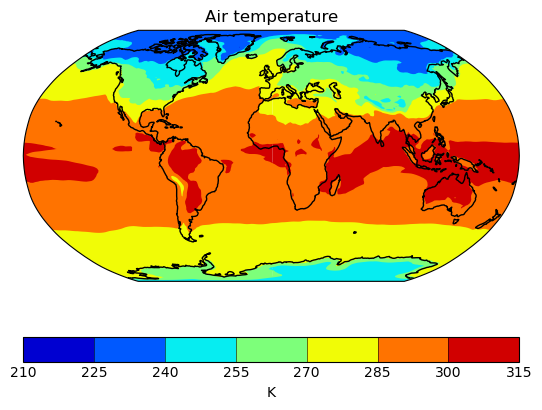

In [25]:
ax = plt.axes(projection=ccrs.Robinson())            # Robinson map projection 
qplt.contourf(cube[0,:,:])
plt.gca().coastlines()
plt.show();


HDF5-DIAG: Error detected in HDF5 (1.12.2) thread 1:
  #000: H5A.c line 528 in H5Aopen_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #001: H5VLcallback.c line 1091 in H5VL_attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #002: H5VLcallback.c line 1058 in H5VL__attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #003: H5VLnative_attr.c line 130 in H5VL__native_attr_open(): can't open attribute
    major: Attribute
    minor: Can't open object
  #004: H5Aint.c line 545 in H5A__open_by_name(): unable to load attribute info from object header
    major: Attribute
    minor: Unable to initialize object
  #005: H5Oattribute.c line 476 in H5O__attr_open_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #006: H5Adense.c line 394 in H5A__dense_open(): can't locate attribute in name index
    major: Attribute
    minor: Object not 

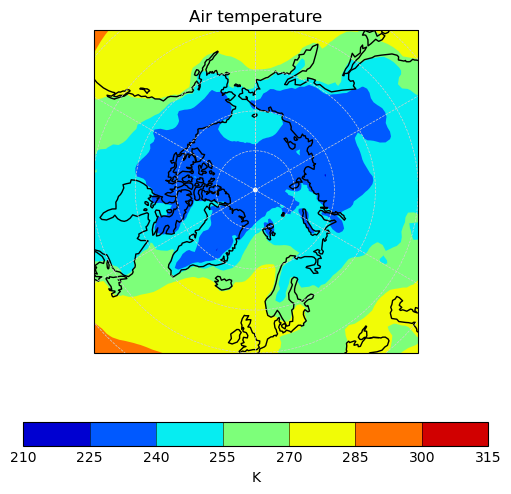

In [26]:
fig = plt.figure(figsize=(6,6))                 
ax = plt.axes(projection=ccrs.NorthPolarStereo())    # NorthPolarStereo map projection
ax.set_extent([0, 359, 50, 90], crs=ccrs.PlateCarree()) 
ax.gridlines(color='lightgray',linestyle='--',linewidth=0.5)          # gridline 설정
qplt.contourf(cube[0,:,:]) 
plt.gca().coastlines()
plt.show();


In [27]:
# 3-2

In [28]:
# 3-2-1

In [29]:
cube_ext = cube.extract(iris.Constraint(longitude=125))      # 특정 경도값에 대하여 추출
print(cube_ext.summary(True))


air_temperature / (K)               (time: 1380; latitude: 144)


In [30]:
# 3-2-2

In [31]:
coord_names = [coord.name() for coord in cube.coords()]
print(coord_names)


['time', 'latitude', 'longitude', 'height']


In [32]:
iris.coord_categorisation.add_year(cube, 'time')           # 연도 카테고리를 추가
iris.coord_categorisation.add_season(cube, 'time')       # 계절 카테고리를 추가
coord_names = [coord.name() for coord in cube.coords()]
print(coord_names)


['time', 'latitude', 'longitude', 'height', 'season', 'year']


In [33]:
print(cube.coord('year'))     # year에 대한 coordinate 정보 출력
print(cube.coord('season'))# season에 대한 coordinate 정보 출력


AuxCoord :  year / (1)
    points: [1900, 1900, ..., 2014, 2014]
    shape: (1380,)
    dtype: int64
    long_name: 'year'
AuxCoord :  season / (no_unit)
    points: [djf, djf, ..., son, djf]
    shape: (1380,)
    dtype: <U64
    long_name: 'season'


In [34]:
cube_2014 = cube.extract(iris.Constraint(year=2014))      #2014년에 해당되는 자료를 추출
print(cube_2014.summary(True))       # 월별자료이므로 2014년의 12개월 자료가 추출을 확인


air_temperature / (K)               (time: 12; latitude: 144; longitude: 192)


In [35]:
# lambda 명령을 이용, 1951년 부터 2000년까지 50년 자료 추출
cube_50yrs = cube.extract(iris.Constraint(year=lambda yr:1951<=yr<=2000))
print(cube_50yrs.shape)           # 큐브의 격자숫자 확인, 12개월 x 50년 = 600 개 


(600, 144, 192)


In [36]:
# 전체 자료 중 겨울철 (DJF season)에 대한 자료 추출
cube_djf = cube.extract(iris.Constraint(season='djf'))         # 겨울철 자료만 추출  
print(cube_djf.shape)  # 3개월(DJF)x165년=495 개 시간 격자 확인


(345, 144, 192)


In [37]:
# 3-2-3

HDF5-DIAG: Error detected in HDF5 (1.12.2) thread 2:
  #000: H5A.c line 528 in H5Aopen_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #001: H5VLcallback.c line 1091 in H5VL_attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #002: H5VLcallback.c line 1058 in H5VL__attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #003: H5VLnative_attr.c line 130 in H5VL__native_attr_open(): can't open attribute
    major: Attribute
    minor: Can't open object
  #004: H5Aint.c line 545 in H5A__open_by_name(): unable to load attribute info from object header
    major: Attribute
    minor: Unable to initialize object
  #005: H5Oattribute.c line 476 in H5O__attr_open_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #006: H5Adense.c line 394 in H5A__dense_open(): can't locate attribute in name index
    major: Attribute
    minor: Object not 

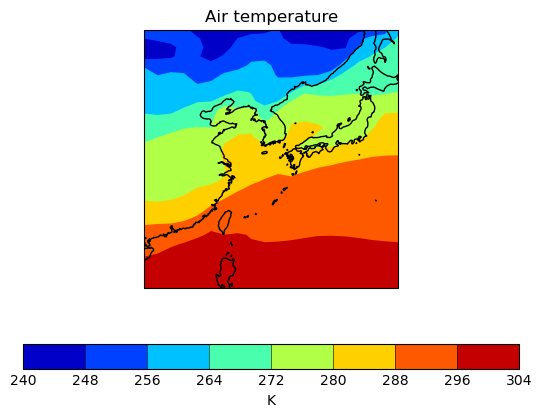

In [38]:
# 수평격자 자르기, 위도 15-50, 경도 110-145 영역
cube_region = cube.intersection(latitude=(15,50),longitude=(110,145))   
# 아래 extract와 동일한 방식이지만 훨씬 짧은 명령으로 가능함
# cube_region = cube.extract(iris.Constraint(latitude=lambda lat:15<=lat<=50, lon gitude=lambda lon:110<=lon<=145))
qplt.contourf(cube_region[0,:,:])
plt.gca().coastlines()
plt.show();


In [39]:
# 3-2-4

In [40]:
print(cube_region.shape)      # 격자모양을 확인, 시간 1980개, 위도 30개, 경도 20개 격자구조


(1380, 30, 20)


HDF5-DIAG: Error detected in HDF5 (1.12.2) thread 1:
  #000: H5A.c line 528 in H5Aopen_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #001: H5VLcallback.c line 1091 in H5VL_attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #002: H5VLcallback.c line 1058 in H5VL__attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #003: H5VLnative_attr.c line 130 in H5VL__native_attr_open(): can't open attribute
    major: Attribute
    minor: Can't open object
  #004: H5Aint.c line 545 in H5A__open_by_name(): unable to load attribute info from object header
    major: Attribute
    minor: Unable to initialize object
  #005: H5Oattribute.c line 476 in H5O__attr_open_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #006: H5Adense.c line 394 in H5A__dense_open(): can't locate attribute in name index
    major: Attribute
    minor: Object not 

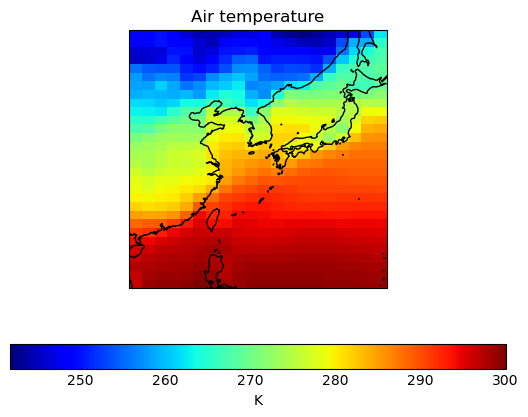

In [41]:
qplt.pcolormesh(cube_region[0,:,:])     # 격자 모양대로 그림을 출력, 이전 Contour 그림과 비교
plt.gca().coastlines()
plt.show();


HDF5-DIAG: Error detected in HDF5 (1.12.2) thread 2:
  #000: H5A.c line 528 in H5Aopen_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #001: H5VLcallback.c line 1091 in H5VL_attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #002: H5VLcallback.c line 1058 in H5VL__attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #003: H5VLnative_attr.c line 130 in H5VL__native_attr_open(): can't open attribute
    major: Attribute
    minor: Can't open object
  #004: H5Aint.c line 545 in H5A__open_by_name(): unable to load attribute info from object header
    major: Attribute
    minor: Unable to initialize object
  #005: H5Oattribute.c line 476 in H5O__attr_open_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #006: H5Adense.c line 394 in H5A__dense_open(): can't locate attribute in name index
    major: Attribute
    minor: Object not 

HDF5-DIAG: Error detected in HDF5 (1.12.2) thread 1:
  #000: H5A.c line 528 in H5Aopen_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #001: H5VLcallback.c line 1091 in H5VL_attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #002: H5VLcallback.c line 1058 in H5VL__attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #003: H5VLnative_attr.c line 130 in H5VL__native_attr_open(): can't open attribute
    major: Attribute
    minor: Can't open object
  #004: H5Aint.c line 545 in H5A__open_by_name(): unable to load attribute info from object header
    major: Attribute
    minor: Unable to initialize object
  #005: H5Oattribute.c line 476 in H5O__attr_open_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #006: H5Adense.c line 394 in H5A__dense_open(): can't locate attribute in name index
    major: Attribute
    minor: Object not 

/Users/djin1/opt/miniconda3/lib/python3.8/site-packages/iris/coords.py:2047: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/Users/djin1/opt/miniconda3/lib/python3.8/site-packages/iris/coords.py:2047: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(


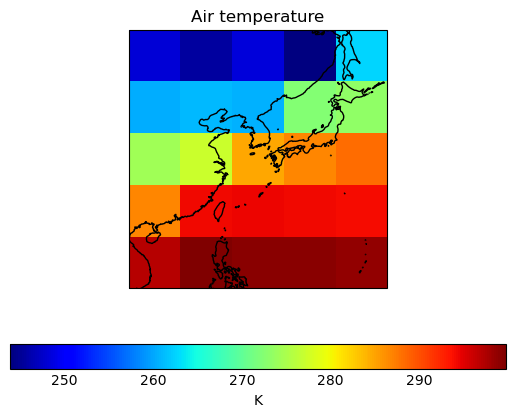

In [42]:
# np.linspace(110, 145, 5))는 110~145 사이를 5개 간격으로 나눠서 리스트로 반환하는 명령임
sample_points = [('longitude', np.linspace(110,145,5)), ('latitude', np.linspace(15,50,5))]
# sample_points 크기로 cube_region의 위경도격자를 내삽
cube_inter = cube_region.interpolate(sample_points, iris.analysis.Linear())
qplt.pcolormesh(cube_inter[0,:,:]);
plt.gca().coastlines()
plt.show();


In [43]:
print(cube_inter.shape)

(1380, 5, 5)


In [44]:
# 3-2-5

In [45]:
new_file_name = indir+'tas_Amon_IPSL-CM6A-LR_historical_r1i1p1f1_gr_190001-201412.nc'
target_cube = iris.load_cube(new_file_name)
print(target_cube.shape)            


(1380, 143, 144)


/Users/djin1/opt/miniconda3/lib/python3.8/site-packages/iris/fileformats/cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(
HDF5-DIAG: Error detected in HDF5 (1.12.2) thread 2:
  #000: H5A.c line 528 in H5Aopen_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #001: H5VLcallback.c line 1091 in H5VL_attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #002: H5VLcallback.c line 1058 in H5VL__attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #003: H5VLnative_attr.c line 130 in H5VL__native_attr_open(): can't open attribute
    major: Attribute
    minor: Can't open object
  #004: H5Aint.c line 545 in H5A__open_by_name(): unable to load attribute info from object header
    major: Attribute
    minor: Unable to initialize object
  #005: H5Oattribute.c line 476 in H5O__attr_open_by_name(): can

In [46]:
cube_regrid = cube.regrid(target_cube, iris.analysis.Linear())
print(cube.shape)             # regrid 하기전 기존 큐브의 격자 정보 
print(cube_regrid.shape)     # regrid 이후 격자 정보를 확인


(1380, 144, 192)
(1380, 143, 144)


In [47]:
# 3-2-6

HDF5-DIAG: Error detected in HDF5 (1.12.2) thread 1:
  #000: H5A.c line 528 in H5Aopen_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #001: H5VLcallback.c line 1091 in H5VL_attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #002: H5VLcallback.c line 1058 in H5VL__attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #003: H5VLnative_attr.c line 130 in H5VL__native_attr_open(): can't open attribute
    major: Attribute
    minor: Can't open object
  #004: H5Aint.c line 545 in H5A__open_by_name(): unable to load attribute info from object header
    major: Attribute
    minor: Unable to initialize object
  #005: H5Oattribute.c line 476 in H5O__attr_open_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #006: H5Adense.c line 394 in H5A__dense_open(): can't locate attribute in name index
    major: Attribute
    minor: Object not 

HDF5-DIAG: Error detected in HDF5 (1.12.2) thread 2:
  #000: H5A.c line 528 in H5Aopen_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #001: H5VLcallback.c line 1091 in H5VL_attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #002: H5VLcallback.c line 1058 in H5VL__attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #003: H5VLnative_attr.c line 130 in H5VL__native_attr_open(): can't open attribute
    major: Attribute
    minor: Can't open object
  #004: H5Aint.c line 545 in H5A__open_by_name(): unable to load attribute info from object header
    major: Attribute
    minor: Unable to initialize object
  #005: H5Oattribute.c line 476 in H5O__attr_open_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #006: H5Adense.c line 394 in H5A__dense_open(): can't locate attribute in name index
    major: Attribute
    minor: Object not 

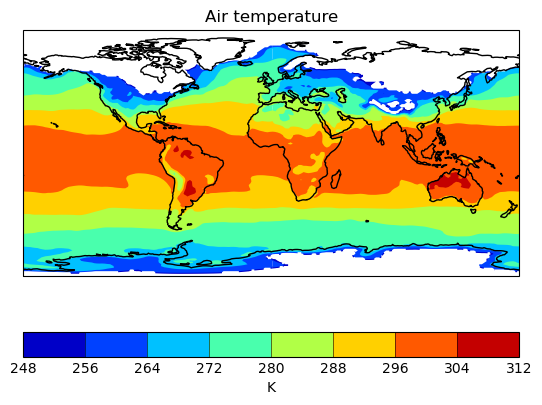

In [48]:
# 큐브의 값이 255도 이하인 격자 위치를 찾아서 True로 아닌 격자는 False로 저장
masked = np.where(cube.data < 255., True, False)   
cube_masked = cube.copy()           # cube_masked에 기존 cube의 coordinate 정보를 복사
cube_masked.data = ma.array(cube.data, mask=masked)     # 마스킹 처리
qplt.contourf(cube_masked[0,:,:])        # 그림으로 표출
plt.gca().coastlines()
plt.show();


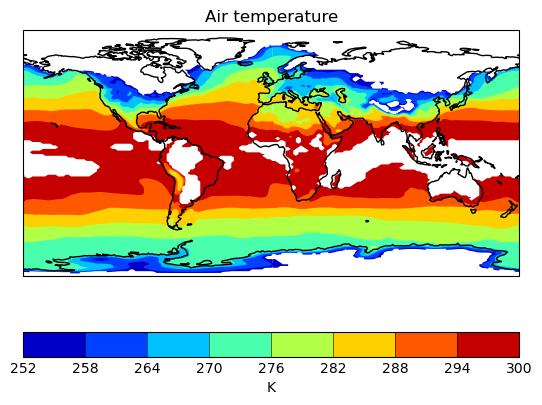

In [49]:
# 기온이 255도 이하이거나 또는 300도가 넘는 값을 가진 격자를 마스킹
masked = np.where((cube.data < 255.) | (cube.data > 300.), True, False)
cube_masked = cube.copy()
cube_masked.data = ma.array(cube.data, mask=masked)
qplt.contourf(cube_masked[0,:,:])
plt.gca().coastlines()
plt.show();


In [50]:
print(cube_masked[0,0,:].data)

[-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --]


In [51]:
# 3-2-7

In [52]:
# 전체 165년에 대한 연평균을 계산하여 annual 큐브에 저장
annual = cube.aggregated_by(['year'], iris.analysis.MEAN) 
print(annual.shape)
# 4계절에 대한 계절 평균을 계산하여 season 큐브에 저장 (0:DJF, 1:MAM, 2:JJA, 3:SON)
season = cube.aggregated_by(['season'],iris.analysis.MEAN)
print(season.shape)


(115, 144, 192)
(4, 144, 192)


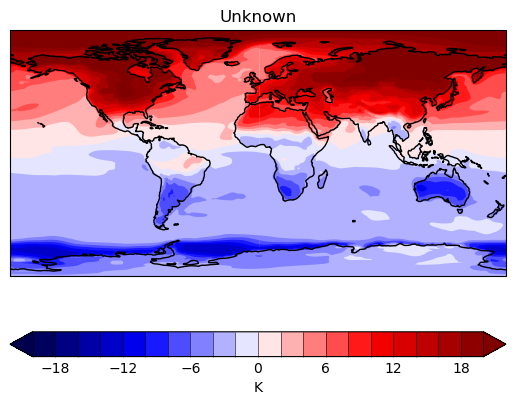

In [53]:
diff_season = season[2] - season[1]# 큐브 JJA - DJF 차이를 계산
levels = np.linspace(-20,20,21) # color bar level 범위를 설정
qplt.contourf(diff_season, levels, cmap=plt.cm.seismic, extend='both')  # 색지도 설정
plt.gca().coastlines()
plt.show();

In [54]:
# 3-2-8

/Users/djin1/opt/miniconda3/lib/python3.8/site-packages/iris/analysis/cartography.py:412: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


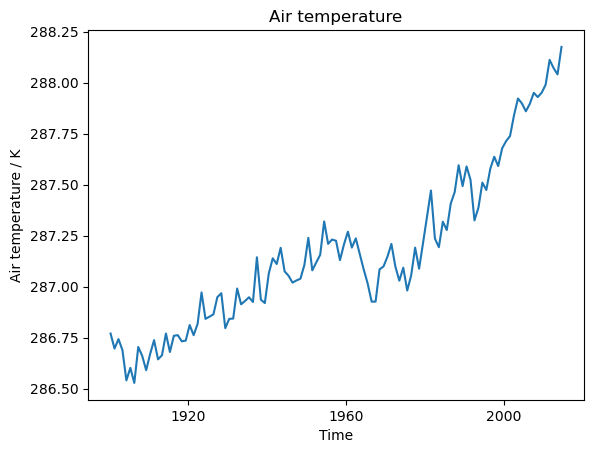

In [55]:
weight = iris.analysis.cartography.area_weights(annual)    # 영역에 대한 weight를 계산
wgtd_mean = annual.collapsed(['latitude','longitude'],  \
                            iris.analysis.MEAN, weights = weight)    # 윗줄의 백슬러시 ‘\’ 는 줄바꿈 기호
qplt.plot(wgtd_mean)
plt.show();


In [56]:
# 3-2-9

/Users/djin1/opt/miniconda3/lib/python3.8/site-packages/iris/coords.py:2226: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'year', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'year'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


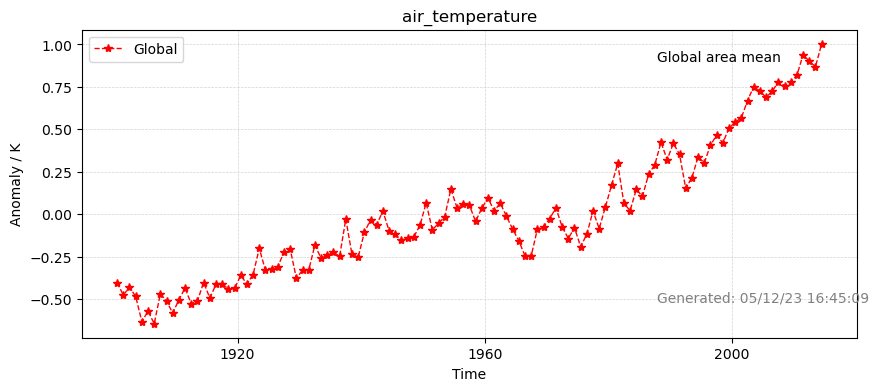

In [57]:
time = time.strftime('%x %X', time.localtime(time.time()))    # 현재시간을 저장
plt.figure(figsize=(10,4)) # 그림사이즈 설정
plt.figtext(0.7, 0.8, 'Global area mean', ha='left', color='black')     # 텍스트 표시
plt.figtext(0.7, 0.2, 'Generated: '+time, ha='left', color='gray')       # 그림 생성 시간 표시

unit = wgtd_mean.units                      # 데이터 유닛을 저장
title = wgtd_mean.standard_name           # 변수 이름을 저장
plot_index = '*--'    # 그림 인덱스, 마크를 * 라인은 Dashed 설정
clim = wgtd_mean.collapsed('time', iris.analysis.MEAN)     # 아노말리 계산을 위한 평균값 산출
anomaly = wgtd_mean - clim         # 아노말리 계산

qplt.plot(anomaly, plot_index, color='red', label='Global', lw=1)     # 그림 설정

plt.title(title)                            # 타이틀 출력
plt.xlabel('Time')                          # x축 라벨 출력
plt.ylabel('Anomaly / '+str(unit))       # y축 라벨 출력
plt.legend(fontsize=10)                   # 레전드 출력
plt.grid(color='lightgray',linestyle='--',linewidth=0.5)         # 그리드 라인 출력
plt.show();


/Users/djin1/opt/miniconda3/lib/python3.8/site-packages/iris/analysis/cartography.py:412: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
/Users/djin1/opt/miniconda3/lib/python3.8/site-packages/iris/coords.py:2226: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'year', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'year'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
HDF5-DIAG: Error detected in HDF5 (1.12.2) thread 3:
  #000: H5A.c line 528 in H5Aopen_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #001: H5VLcallback.c line 1091 in H5VL_attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #002: H5VLcallback.c line 1058 in H5VL__attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open

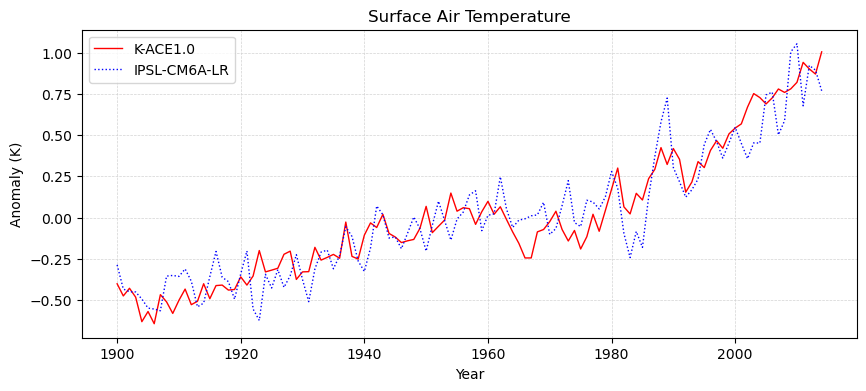

In [58]:
# Categorisation 함수 이용해서 IPSL 모델의 연평균을 계산
iris.coord_categorisation.add_year(target_cube, 'time')
target_annual = target_cube.aggregated_by(['year'], iris.analysis.MEAN) 

# 영역 평균을 위해 위경도 Bounds를 추정, 이미 Bounds가 있는 경우 에러가 발생 하니 주의
target_annual.coord('latitude').guess_bounds()
target_annual.coord('longitude').guess_bounds()

# 영역 평균을 계산
target_weight = iris.analysis.cartography.area_weights(target_annual)
target_wgtd_mean = target_annual.collapsed(['latitude','longitude'],  \
                                  iris.analysis.MEAN, weights = target_weight)

# 전체 기간에 대한 아노말리를 계산
target_clim = target_wgtd_mean.collapsed('time', iris.analysis.MEAN)
target_anomaly = target_wgtd_mean - target_clim

plt.figure(figsize=(10,4))         # 그림 사이즈 설정

# x축 값을 1850년부터 2014년으로, y축 값을 KACE 모델, 빨간실선으로 그림 표출
##plt.plot(np.linspace(1850, 2014, 165), anomaly.data, '-', \
plt.plot(np.linspace(1900, 2014, 115), anomaly.data, '-', \
            color='red', label='K-ACE1.0', lw=1)  

# x축 값을 1850년부터 2014년으로, y축 값을 IPSL 모델, 파란색 파선으로 그림 표출   
##plt.plot(np.linspace(1850, 2014, 165), target_anomaly.data, ':', \
plt.plot(np.linspace(1900, 2014, 115), target_anomaly.data, ':', \
            color='blue', label='IPSL-CM6A-LR', lw=1)

plt.title('Surface Air Temperature')         # 그림 타이틀 출력
plt.xlabel('Year')                              # 그림 x축 라벨 출력
plt.ylabel('Anomaly (K)')                      # 그림 y축 라벨 출력
plt.legend(fontsize=10)                         # 레전드 출력
plt.grid(color='lightgray',linestyle='--',linewidth=0.5)         # 그리드 출력
plt.show();


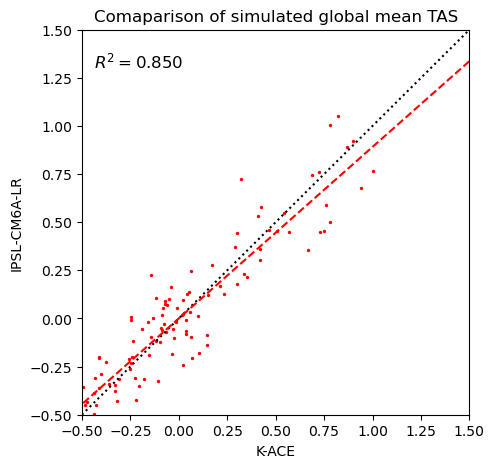

In [59]:
# 초기에 불러왔던 statsmodels.api 모듈을 이용해서 회귀선과 상관관계를 계산
results = sm.OLS(target_anomaly.data,sm.add_constant(anomaly.data)).fit()
X_plot = np.linspace(-1.5,1.5,100)

plt.figure(figsize=(5,5))              # 그림 사이즈 설정
plt.scatter(anomaly.data, target_anomaly.data, color='red', s=2)      # scatter 그림 표출
plt.axis((-0.5,1.5,-0.5,1.5))    # x-y 축 범위 설정
plt.plot((-0.5,1.5), (-0.5,1.5), ':', color='black');     # 1대1 레퍼런스 라인 그리기

# 회귀선 그림 표출
plt.plot(X_plot, X_plot*results.params[1] + results.params[0], '--', color='red') 
# X-Y 상관성 R2 값 저장 및 텍스트 표출
anntxt=r'$R^2={:.3f}$'.format(results.rsquared)
plt.annotate(anntxt,xy=(0.03,0.90), xycoords='axes fraction', \
                    ha='left', fontsize=12, stretch='semi-condensed')

# 그림 타이틀, x축 라벨, y축 라벨 표출
plt.title('Comaparison of simulated global mean TAS')
plt.xlabel('K-ACE')
plt.ylabel('IPSL-CM6A-LR');
plt.show();


In [60]:
# 3-2-10

In [61]:
import iris   # iris 라이브러리 호출
import iris.quickplot as qplt   # iris plotting 라이브러리 호출
import matplotlib.pyplot as plt
import iris.plot as iplt


In [62]:
fname = indir+'tas_Amon_KACE-1-0-G_historical_r1i1p1f1_gr_190001-201412.nc'
cube = iris.load_cube(fname)


/Users/djin1/opt/miniconda3/lib/python3.8/site-packages/iris/fileformats/cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(
HDF5-DIAG: Error detected in HDF5 (1.12.2) thread 4:
  #000: H5A.c line 528 in H5Aopen_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #001: H5VLcallback.c line 1091 in H5VL_attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #002: H5VLcallback.c line 1058 in H5VL__attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #003: H5VLnative_attr.c line 130 in H5VL__native_attr_open(): can't open attribute
    major: Attribute
    minor: Can't open object
  #004: H5Aint.c line 545 in H5A__open_by_name(): unable to load attribute info from object header
    major: Attribute
    minor: Unable to initialize object
  #005: H5Oattribute.c line 476 in H5O__attr_open_by_name(): can

HDF5-DIAG: Error detected in HDF5 (1.12.2) thread 2:
  #000: H5A.c line 528 in H5Aopen_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #001: H5VLcallback.c line 1091 in H5VL_attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #002: H5VLcallback.c line 1058 in H5VL__attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #003: H5VLnative_attr.c line 130 in H5VL__native_attr_open(): can't open attribute
    major: Attribute
    minor: Can't open object
  #004: H5Aint.c line 545 in H5A__open_by_name(): unable to load attribute info from object header
    major: Attribute
    minor: Unable to initialize object
  #005: H5Oattribute.c line 476 in H5O__attr_open_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #006: H5Adense.c line 394 in H5A__dense_open(): can't locate attribute in name index
    major: Attribute
    minor: Object not 

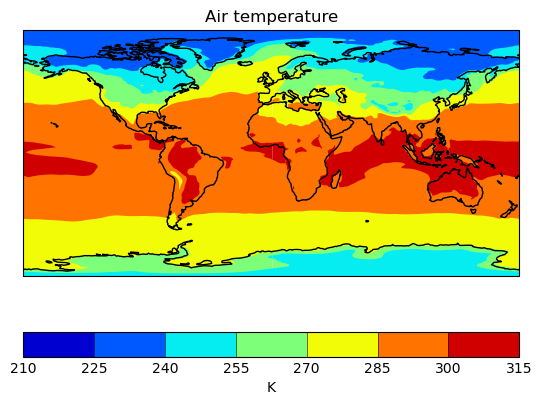

In [63]:
qplt.contourf(cube[0,:,:], cmap='jet')
plt.gca().coastlines();
plt.show();


In [64]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature


HDF5-DIAG: Error detected in HDF5 (1.12.2) thread 1:
  #000: H5A.c line 528 in H5Aopen_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #001: H5VLcallback.c line 1091 in H5VL_attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #002: H5VLcallback.c line 1058 in H5VL__attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #003: H5VLnative_attr.c line 130 in H5VL__native_attr_open(): can't open attribute
    major: Attribute
    minor: Can't open object
  #004: H5Aint.c line 545 in H5A__open_by_name(): unable to load attribute info from object header
    major: Attribute
    minor: Unable to initialize object
  #005: H5Oattribute.c line 476 in H5O__attr_open_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #006: H5Adense.c line 394 in H5A__dense_open(): can't locate attribute in name index
    major: Attribute
    minor: Object not 

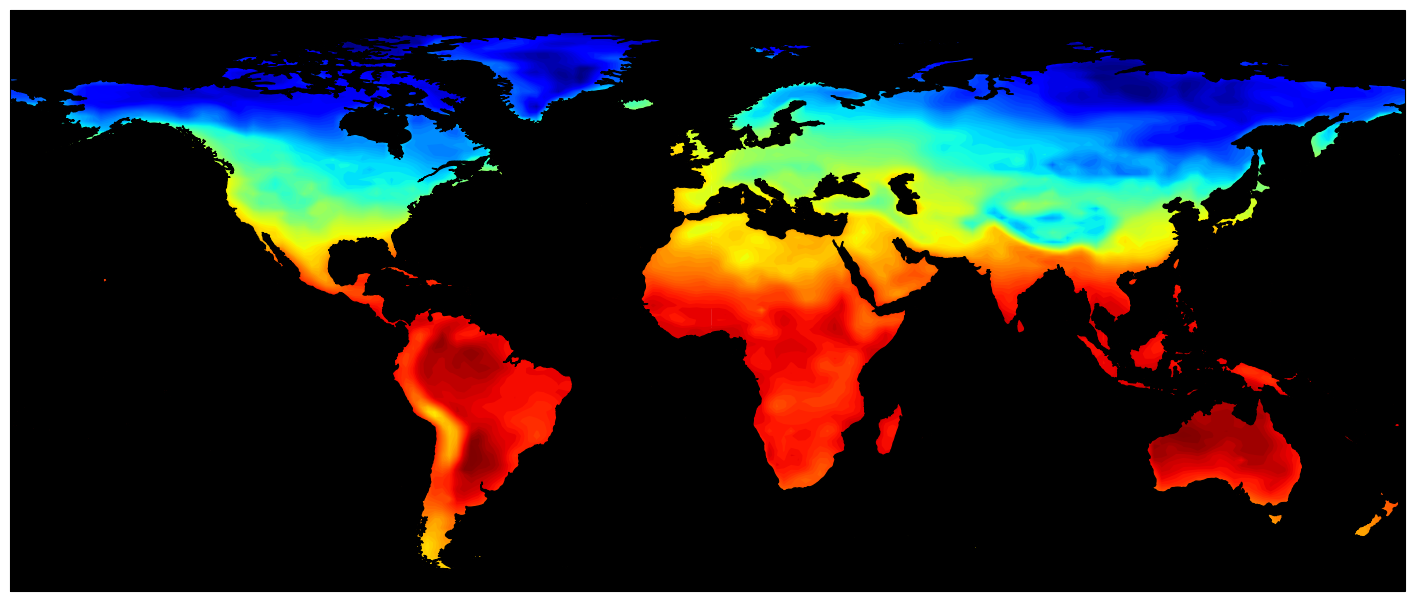

In [65]:
fig = plt.figure(figsize=(18,9))
ax = plt.axes(projection=ccrs.PlateCarree())
cube_n = cube.intersection(latitude=(-60,90)) # 남위 -60도 이하 영역을 제거
iplt.contourf(cube_n[0,:,:], 100, extend='both', cmap='jet')

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'ocean', '50m',\
                                            edgecolor='face', facecolor='black'))
plt.show()


HDF5-DIAG: Error detected in HDF5 (1.12.2) thread 5:
  #000: H5A.c line 528 in H5Aopen_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #001: H5VLcallback.c line 1091 in H5VL_attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #002: H5VLcallback.c line 1058 in H5VL__attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #003: H5VLnative_attr.c line 130 in H5VL__native_attr_open(): can't open attribute
    major: Attribute
    minor: Can't open object
  #004: H5Aint.c line 545 in H5A__open_by_name(): unable to load attribute info from object header
    major: Attribute
    minor: Unable to initialize object
  #005: H5Oattribute.c line 476 in H5O__attr_open_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #006: H5Adense.c line 394 in H5A__dense_open(): can't locate attribute in name index
    major: Attribute
    minor: Object not 

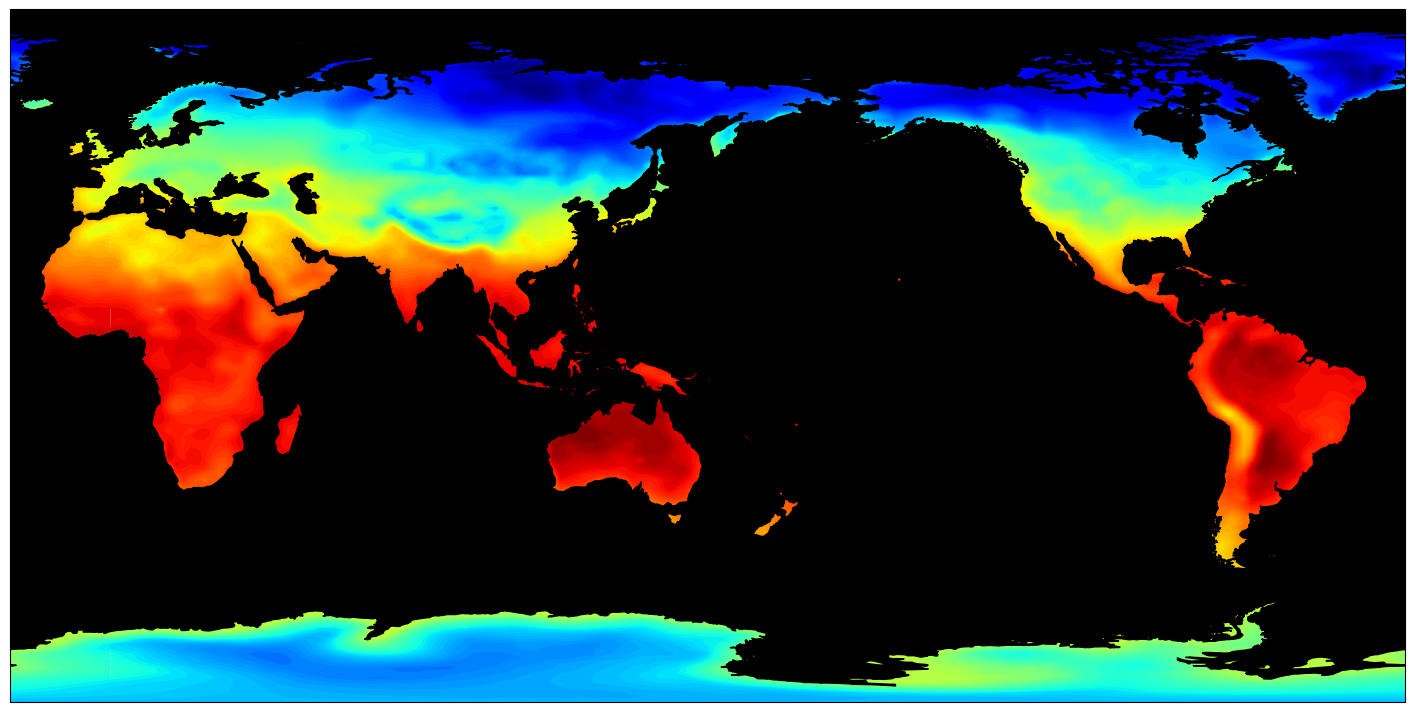

In [66]:
fig = plt.figure(figsize=(18,9))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=155))
iplt.contourf(cube[0,:,:], 100, extend='both', cmap='jet')

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'ocean', '50m',\
                                            edgecolor='face', facecolor='black'))
plt.show();


HDF5-DIAG: Error detected in HDF5 (1.12.2) thread 4:
  #000: H5A.c line 528 in H5Aopen_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #001: H5VLcallback.c line 1091 in H5VL_attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #002: H5VLcallback.c line 1058 in H5VL__attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #003: H5VLnative_attr.c line 130 in H5VL__native_attr_open(): can't open attribute
    major: Attribute
    minor: Can't open object
  #004: H5Aint.c line 545 in H5A__open_by_name(): unable to load attribute info from object header
    major: Attribute
    minor: Unable to initialize object
  #005: H5Oattribute.c line 476 in H5O__attr_open_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #006: H5Adense.c line 394 in H5A__dense_open(): can't locate attribute in name index
    major: Attribute
    minor: Object not 

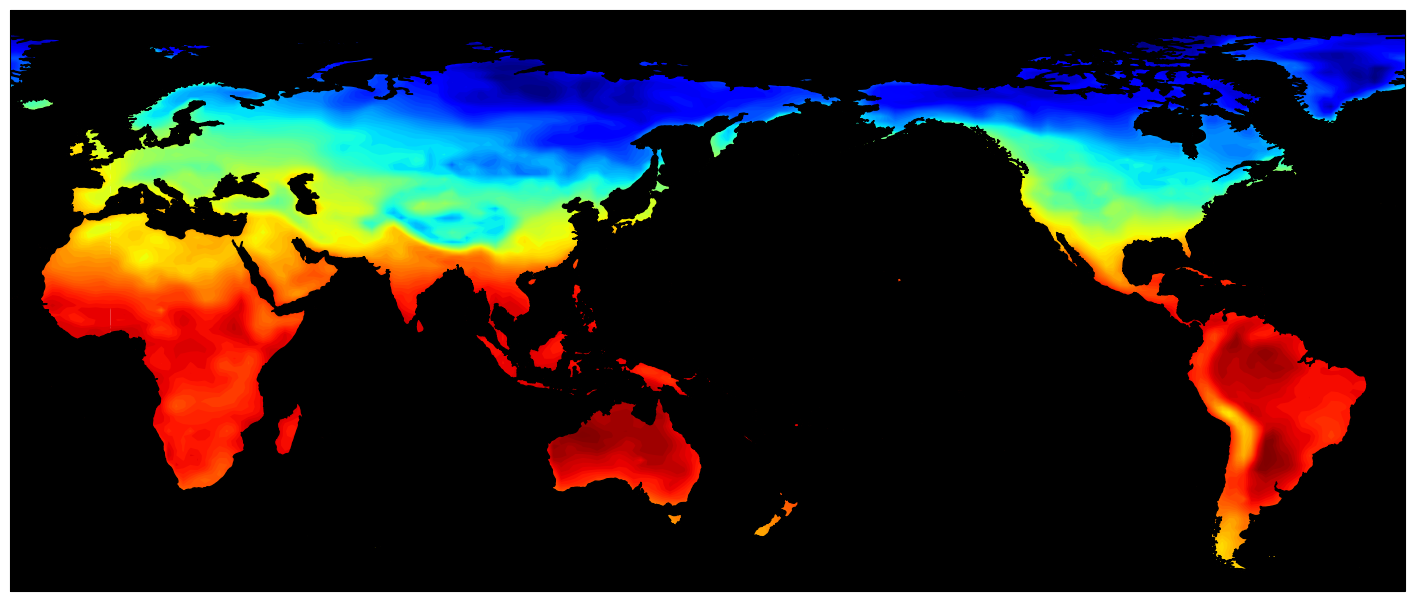

In [67]:
fig = plt.figure(figsize=(18,9))
cube_n = cube.intersection(latitude=(-60,90)) # 남위 -60도 이하 영역을 제거
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=155))
iplt.contourf(cube_n[0,:,:], 100, extend='both', cmap='jet')
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'ocean', '50m',\
                                            edgecolor='face', facecolor='black'))
plt.show();


HDF5-DIAG: Error detected in HDF5 (1.12.2) thread 2:
  #000: H5A.c line 528 in H5Aopen_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #001: H5VLcallback.c line 1091 in H5VL_attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #002: H5VLcallback.c line 1058 in H5VL__attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #003: H5VLnative_attr.c line 130 in H5VL__native_attr_open(): can't open attribute
    major: Attribute
    minor: Can't open object
  #004: H5Aint.c line 545 in H5A__open_by_name(): unable to load attribute info from object header
    major: Attribute
    minor: Unable to initialize object
  #005: H5Oattribute.c line 476 in H5O__attr_open_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #006: H5Adense.c line 394 in H5A__dense_open(): can't locate attribute in name index
    major: Attribute
    minor: Object not 

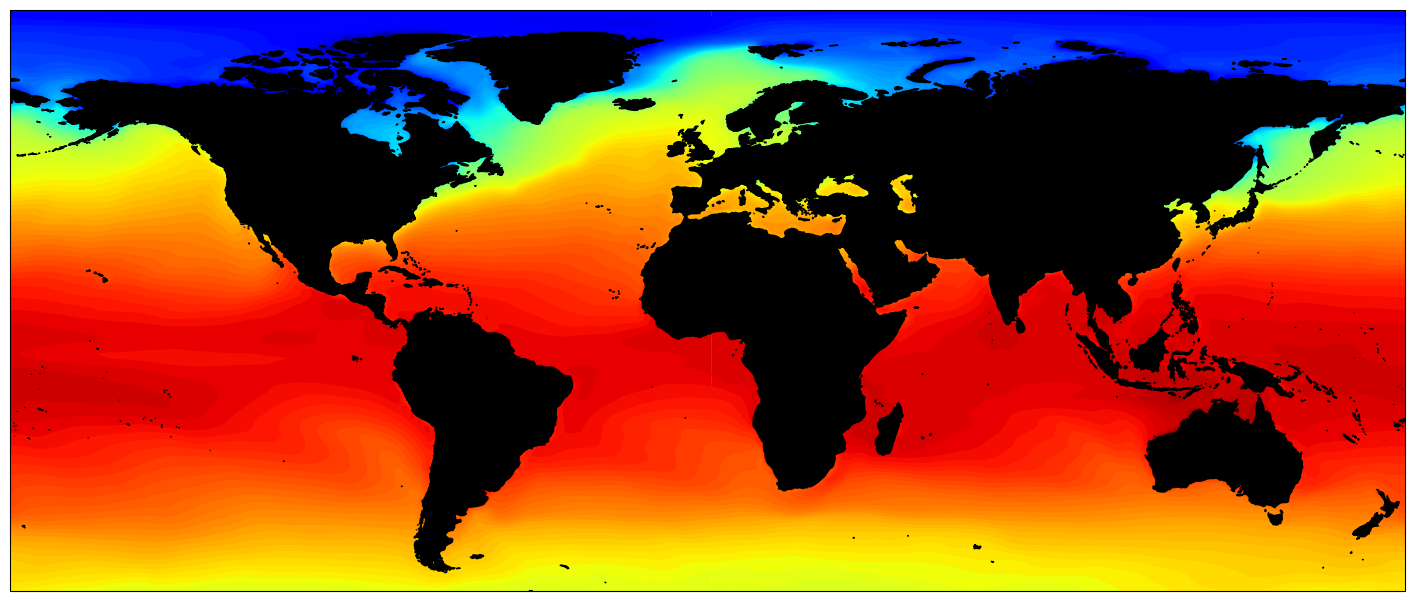

In [68]:
fig = plt.figure(figsize=(18,9))
ax = plt.axes(projection=ccrs.PlateCarree())
cube_n = cube.intersection(latitude=(-60,90)) # 남위 -60도 이하 영역을 제거
iplt.contourf(cube_n[0,:,:], 100, extend='both', cmap='jet')
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',\
                                            edgecolor='face', facecolor='black'))
ax.add_feature(cfeature.LAKES, facecolor='black');
plt.show();


HDF5-DIAG: Error detected in HDF5 (1.12.2) thread 1:
  #000: H5A.c line 528 in H5Aopen_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #001: H5VLcallback.c line 1091 in H5VL_attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #002: H5VLcallback.c line 1058 in H5VL__attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #003: H5VLnative_attr.c line 130 in H5VL__native_attr_open(): can't open attribute
    major: Attribute
    minor: Can't open object
  #004: H5Aint.c line 545 in H5A__open_by_name(): unable to load attribute info from object header
    major: Attribute
    minor: Unable to initialize object
  #005: H5Oattribute.c line 476 in H5O__attr_open_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #006: H5Adense.c line 394 in H5A__dense_open(): can't locate attribute in name index
    major: Attribute
    minor: Object not 

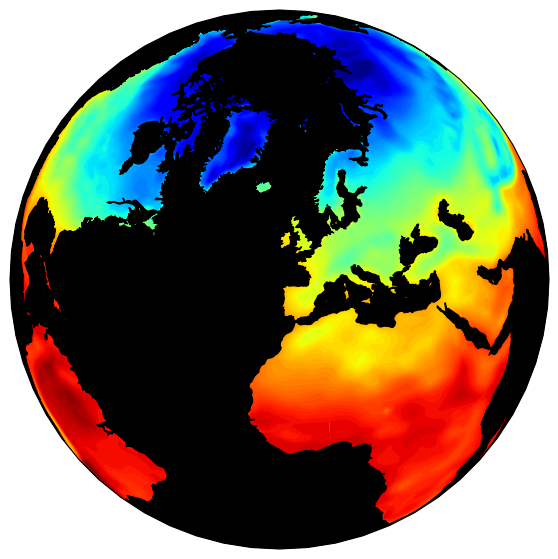

In [69]:
fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection=ccrs.Orthographic(-10, 45))
iplt.contourf(cube[0,:,:], 100, extend='both', cmap='jet')
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'ocean', '50m',\
                                            edgecolor='face', facecolor='black'))
plt.show();


In [71]:
# 3-2-11

In [72]:
import iris
import iris.quickplot as qplt
import matplotlib.pyplot as plt
import iris.plot as iplt
import numpy as np


In [83]:
fname = indir+'tas_Amon_KACE-1-0-G_historical_r1i1p1f1_gr_190001-201412.nc'
cube = iris.load_cube(fname)
diff = cube[0,:,:] - cube[1,:,:]


/Users/djin1/opt/miniconda3/lib/python3.8/site-packages/iris/fileformats/cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(
HDF5-DIAG: Error detected in HDF5 (1.12.2) thread 4:
  #000: H5A.c line 528 in H5Aopen_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #001: H5VLcallback.c line 1091 in H5VL_attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #002: H5VLcallback.c line 1058 in H5VL__attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #003: H5VLnative_attr.c line 130 in H5VL__native_attr_open(): can't open attribute
    major: Attribute
    minor: Can't open object
  #004: H5Aint.c line 545 in H5A__open_by_name(): unable to load attribute info from object header
    major: Attribute
    minor: Unable to initialize object
  #005: H5Oattribute.c line 476 in H5O__attr_open_by_name(): can

  #003: H5VLnative_attr.c line 130 in H5VL__native_attr_open(): can't open attribute
    major: Attribute
    minor: Can't open object
  #004: H5Aint.c line 545 in H5A__open_by_name(): unable to load attribute info from object header
    major: Attribute
    minor: Unable to initialize object
  #005: H5Oattribute.c line 494 in H5O__attr_open_by_name(): can't locate attribute: '_QuantizeBitRoundNumberOfSignificantBits'
    major: Attribute
    minor: Object not found
HDF5-DIAG: Error detected in HDF5 (1.12.2) thread 4:
  #000: H5A.c line 528 in H5Aopen_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #001: H5VLcallback.c line 1091 in H5VL_attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #002: H5VLcallback.c line 1058 in H5VL__attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #003: H5VLnative_attr.c line 130 in H5VL__native_attr_open(): can't open attribute


HDF5-DIAG: Error detected in HDF5 (1.12.2) thread 4:
  #000: H5A.c line 528 in H5Aopen_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #001: H5VLcallback.c line 1091 in H5VL_attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #002: H5VLcallback.c line 1058 in H5VL__attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #003: H5VLnative_attr.c line 130 in H5VL__native_attr_open(): can't open attribute
    major: Attribute
    minor: Can't open object
  #004: H5Aint.c line 545 in H5A__open_by_name(): unable to load attribute info from object header
    major: Attribute
    minor: Unable to initialize object
  #005: H5Oattribute.c line 476 in H5O__attr_open_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #006: H5Adense.c line 394 in H5A__dense_open(): can't locate attribute in name index
    major: Attribute
    minor: Object not 

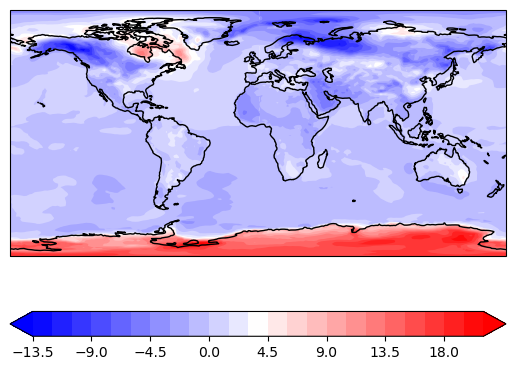

In [74]:
iplt.contourf(diff, 30, cmap=plt.cm.bwr, extend='both')
plt.gca().coastlines()
plt.colorbar(orientation='horizontal');
plt.show();


In [75]:
levels=np.linspace(-19, 19, num=20)
print(levels)


[-19. -17. -15. -13. -11.  -9.  -7.  -5.  -3.  -1.   1.   3.   5.   7.
   9.  11.  13.  15.  17.  19.]


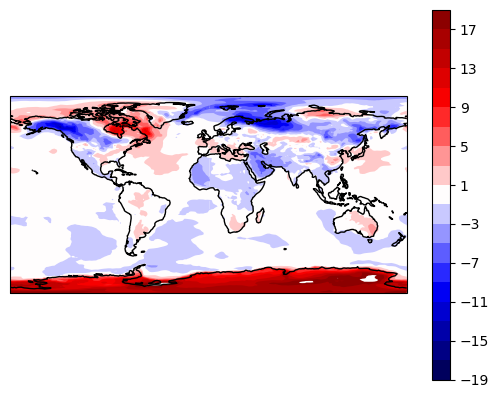

In [76]:
cm = iplt.contourf(diff, levels, cmap=plt.cm.seismic)
plt.gca().coastlines()
plt.colorbar(); plt.show();


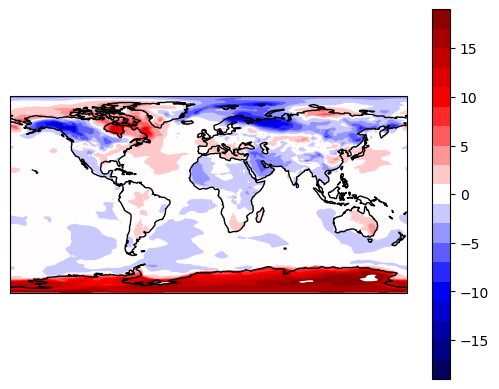

In [77]:
cm = iplt.contourf(diff, levels, cmap=plt.cm.seismic)
plt.gca().coastlines()
plt.colorbar(cm,ticks=np.arange(-20,25,5));
plt.show();


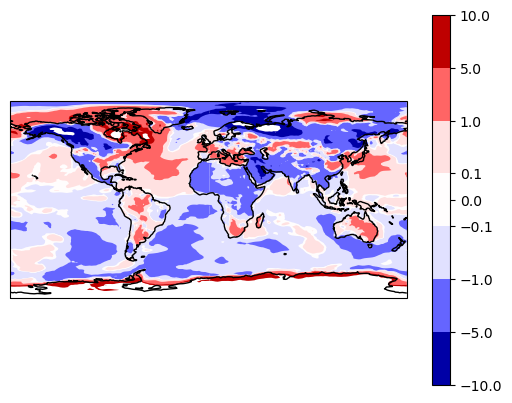

In [78]:
levels = [-10, -5, -1, -0.1, 0.1, 1, 5, 10]
cm = iplt.contourf(diff,levels, cmap=plt.cm.seismic)
plt.gca().coastlines()
plt.colorbar(cm,ticks=[-10, -5, -1, -0.1, 0, 0.1, 1, 5, 10]);   # 틱레벨에 중심선 0 값을 추가
plt.show();
